In [50]:
import pandas as pd
import os
from Constants.directory_paths import fcp_data_directories_with_demographics, fcp_root
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

### FCP Dataset

Cleaning the demographics information

In [38]:
concatenated_frame = []
column_names = ['subject', 'serial_no', 'age', 'sex']

no_mprage_data_directory = ['NewHaven_b', 'Leipzig', 'Dallas', 'Pittsburgh', 'NewHaven_a']
currupted_data_directory = ['Orangeburg']
np_mprage_data_file = { 'Newark': 'sub46570' }

for directory in fcp_data_directories_with_demographics:
    if directory not in no_mprage_data_directory and directory not in currupted_data_directory:
        data = pd.read_table(fcp_root + directory + '/' + directory + '_demographics.txt', sep='\t', header=None, usecols=[0,1,2,3])
        df = pd.DataFrame(data)
        df.columns = ['subject', 'serial_no', 'sex', 'age'] if directory == 'NewYork_a' or directory == 'NewYork_a_ADHD' else ['subject', 'serial_no', 'age', 'sex']
        df = df.reindex(columns=column_names)
        df['hospital'] = directory
        entries = list(df['subject'])
        if len(entries) != len(set(entries)):
            raise('duplicate entries found!')
        df = df[(df.age > 17.99) & (df.age < 100.00)]
        if directory in np_mprage_data_file:
            df = df[df.subject != np_mprage_data_file[directory]]
        print(directory + ' ' + str(len(df)))
        concatenated_frame.append(df)

df = pd.concat(concatenated_frame, ignore_index=True)

Berlin_Margulies 26
Milwaukee_b 46
Atlanta 28
Cambridge_Buckner 198
Queensland 19
SaintLouis 31
Leiden_2180 12
NewYork_a_ADHD 25
AnnArbor_a 13
ICBM 86
PaloAlto 17
Oxford 22
AnnArbor_b 35
Baltimore 23
Bangor 20
NewYork_b 20
Munchen 16
Beijing_Zang 198
Newark 18
Oulu 103
Leiden_2200 19
NewYork_a 59


In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

       subject  serial_no    age  sex           hospital
0     sub06204          1  34.00    m   Berlin_Margulies
1     sub06716          2  23.00    f   Berlin_Margulies
2     sub12855          3  33.00    m   Berlin_Margulies
3     sub18913          4  29.00    f   Berlin_Margulies
4     sub23506          5  27.00    f   Berlin_Margulies
5     sub27536          6  25.00    m   Berlin_Margulies
6     sub27711          7  26.00    f   Berlin_Margulies
7     sub27797          8  31.00    m   Berlin_Margulies
8     sub28092          9  26.00    f   Berlin_Margulies
9     sub33248         10  28.00    f   Berlin_Margulies
10    sub38279         11  29.00    m   Berlin_Margulies
11    sub40143         12  34.00    m   Berlin_Margulies
12    sub47066         13  26.00    f   Berlin_Margulies
13    sub47791         14  31.00    m   Berlin_Margulies
14    sub49134         15  44.00    m   Berlin_Margulies
15    sub54976         16  37.00    m   Berlin_Margulies
16    sub57028         17  37.0

### IXI Dataset

We removed the duplicate entries from ixi demographics file manually, checked which files were missing and added the hospital names. Created a CSV file for the same and uploaded to this machine.

In [40]:
data = pd.read_csv('./ixi_demographics.csv')

In [41]:
df_ixi = pd.DataFrame(data)
df_ixi.columns = ['serial_no', 'sex', 'hospital', 'age', 'subject']
df_ixi = df_ixi.reindex(columns=['subject', 'serial_no', 'age', 'sex', 'hospital'])
concatenated_frame.append(df_ixi)

In [42]:
df = pd.concat(concatenated_frame, ignore_index=True)

In [43]:
df

,subject,serial_no,age,sex,hospital
0,sub06204,1,34.000000,m,Berlin_Margulies
1,sub06716,2,23.000000,f,Berlin_Margulies
2,sub12855,3,33.000000,m,Berlin_Margulies
3,sub18913,4,29.000000,f,Berlin_Margulies
4,sub23506,5,27.000000,f,Berlin_Margulies
5,sub27536,6,25.000000,m,Berlin_Margulies
6,sub27711,7,26.000000,f,Berlin_Margulies
7,sub27797,8,31.000000,m,Berlin_Margulies
8,sub28092,9,26.000000,f,Berlin_Margulies
9,sub33248,10,28.000000,f,Berlin_Margulies


There are 1597 patients
There are 25 hospitals
There are 52.66% of women
Age statistics : 
count    1597.000000
mean       35.599132
std        17.491271
min        18.000000
25%        22.000000
50%        27.000000
75%        48.052019
max        86.318960
Name: age, dtype: float64


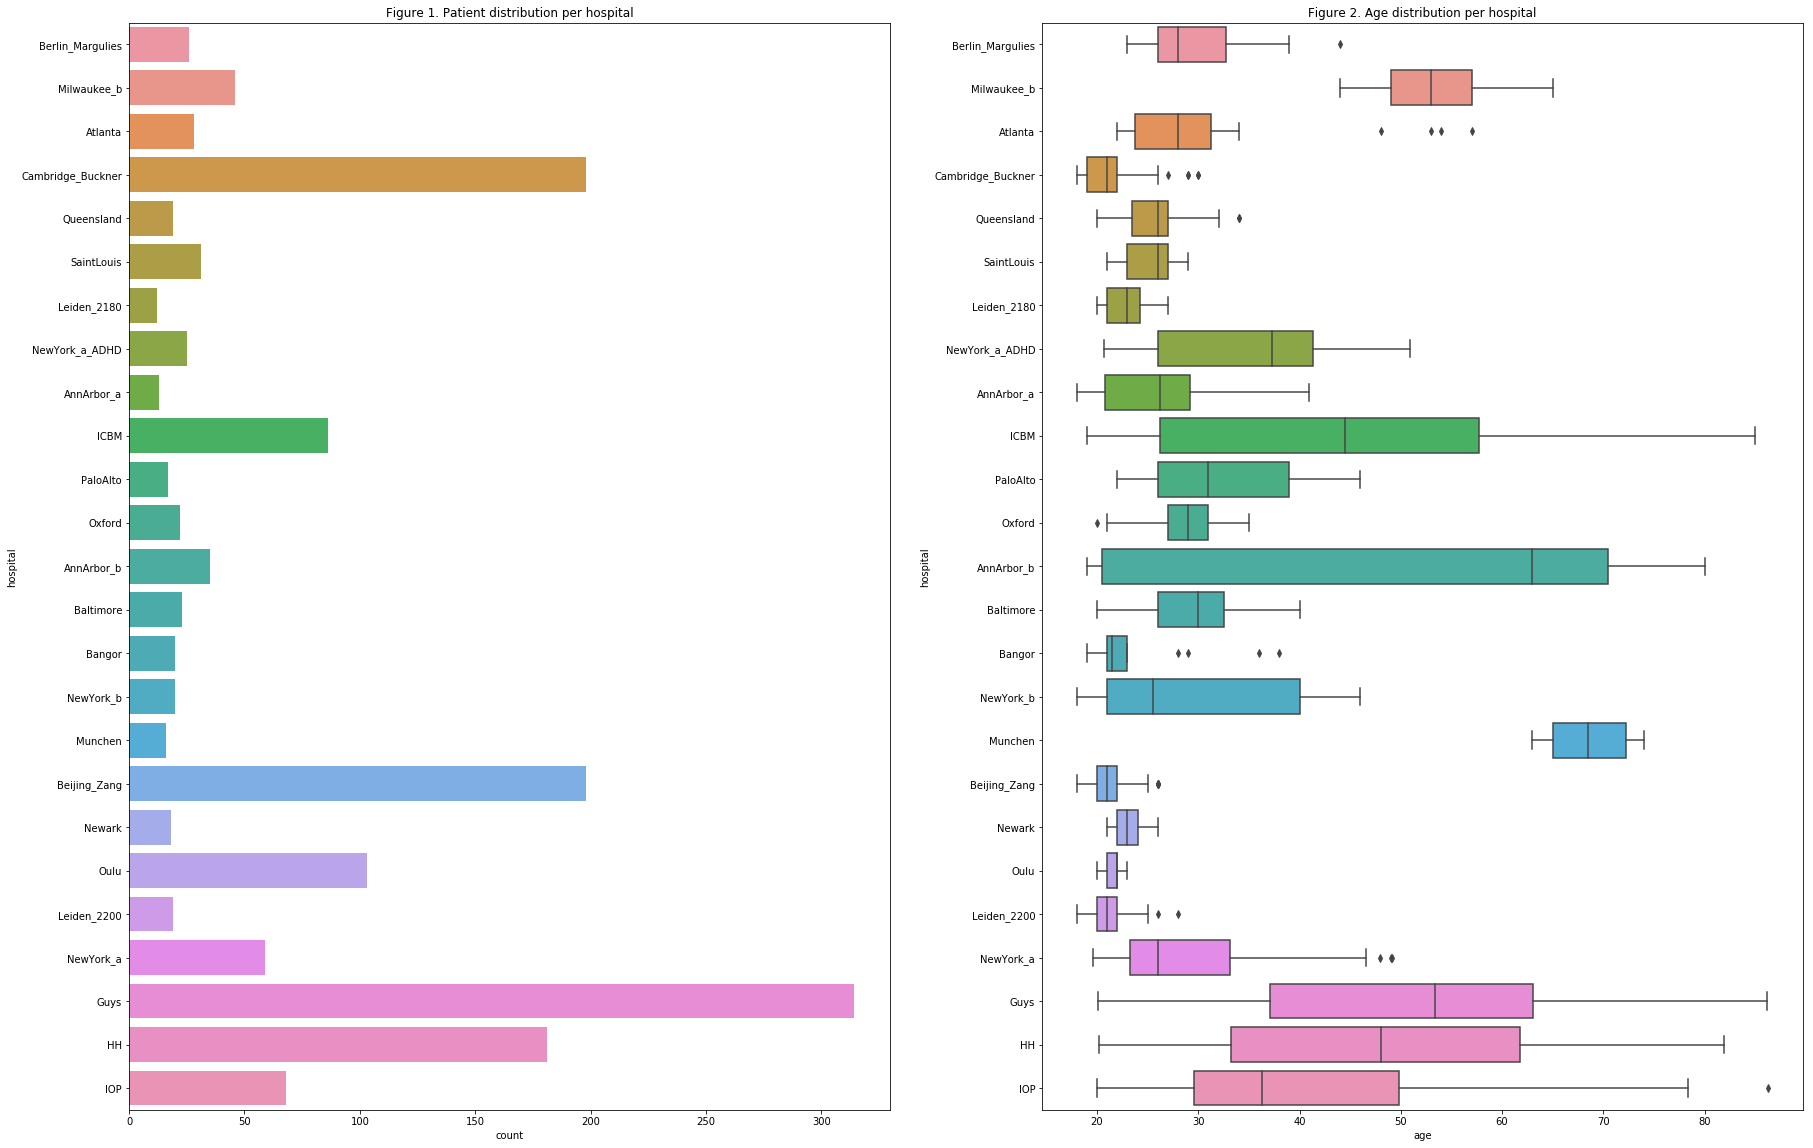

In [54]:
print('There are {} patients'.format(len(df)))
print('There are {} hospitals'.format(len(df.hospital.unique())))
print('There are {:.2f}% of women'.format(100*np.mean(df.sex == 'f')))
print('Age statistics : ')
print(df.age.describe())

# We plot the patient count over hospitals
plt.figure(figsize=(30,20)) 
plt.subplot(121)
sns.countplot(y='hospital', data=df)
plt.title('Figure 1. Patient distribution per hospital')

# We plot the age distribution over hospitals
plt.subplot(122)
sns.boxplot(x='age', y='hospital', data=df)
plt.title('Figure 2. Age distribution per hospital');

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


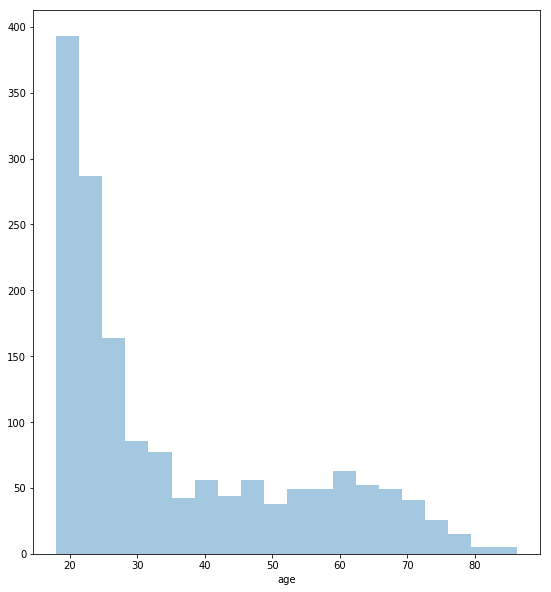

In [69]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(df["age"], bins=20, kde=False, label='Number of Subjects')
plt.show()